In [1]:
from queue import PriorityQueue
import time

#### **A * search using Manhattan distance**

In [2]:
# Declaring the heuristic function as manhattan distance
def heuristic(cell1,cell2):
    x1,y1=cell1
    x2,y2=cell2
    return abs(x1-x2) + abs(y1-y2)

In [3]:
def aStar(m):
    st = time.time()
    start=(m.rows,m.cols)
    goal=(1,1)
    g_score={cell:float('inf') for cell in m.grid}
    g_score[start]=0
    f_score={cell:float('inf') for cell in m.grid}
    f_score[start]=heuristic(start,goal)

    open=PriorityQueue()
    open.put((heuristic(start,goal),heuristic(start,goal),start))
    aPath={}
    searchPath = []
    
    while not open.empty():
        currCell=open.get()[2]
        searchPath.append(currCell)

        if currCell == goal:
            break

        for d in 'ESNW':
            if m.maze_map[currCell][d] == True:
                if d == 'E':
                    childCell = (currCell[0], currCell[1]+1)
                if d == "W":
                    childCell = (currCell[0], currCell[1]-1)
                if d == "S":
                    childCell = (currCell[0]+1, currCell[1])   
                if d == "N":
                    childCell = (currCell[0]-1, currCell[1])  
   
                temp_g_score = g_score[currCell]+1
                temp_f_score = temp_g_score + heuristic(childCell,(1,1))

                if temp_f_score < f_score[childCell]:
                    g_score[childCell] = temp_g_score
                    f_score[childCell] = temp_f_score
                    open.put((temp_f_score, heuristic(childCell,(1,1)),childCell))
                    aPath[childCell]=currCell
    
    fwdPath={}
    
    while goal!=start:
        fwdPath[aPath[goal]]=goal
        goal=aPath[goal]

    et = time.time()
    elapsed_time = et - st

    return fwdPath, elapsed_time

#### **Breadth-First Search where a cell is allowed to be visited at most thrice**

In [4]:
def BFS(m):
    st = time.time()
    start = (m.rows, m.cols)
    explored = {start: 1}
    frontier = [start]

    bfsPath = {}
    searchPath = []

    while len(frontier) > 0:
        currCell = frontier.pop(0)
        searchPath.append(currCell)

        if currCell == (1, 1):
            break

        for d in 'ESNW':
            if m.maze_map[currCell][d] == True:
                if d == 'E':
                    childCell = (currCell[0], currCell[1] + 1)
                elif d == "W":
                    childCell = (currCell[0], currCell[1] - 1)
                elif d == "S":
                    childCell = (currCell[0] + 1, currCell[1])
                elif d == "N":
                    childCell = (currCell[0] - 1, currCell[1])

                if childCell in explored and explored[childCell] == 3:
                    continue

                # Update the visit count or add the cell to the explored dictionary
                if childCell in explored:
                    explored[childCell] += 1
                else:
                    explored[childCell] = 1

                frontier.append(childCell)
                bfsPath[childCell] = currCell

    fwdPath = {}
    cell = (1, 1)

    while cell != start:
        fwdPath[bfsPath[cell]] = cell
        cell = bfsPath[cell]

    et = time.time()
    elapsed_time = et - st

    return fwdPath, elapsed_time

In [5]:
from pyamaze import maze
# maze1 is a 10*10 maze with loopPercent 3
maze1 = maze()
maze1.CreateMaze(loadMaze="10-maze.csv")

# maze2 is a 20*20 maze with loopPercent 3
maze2 = maze()
maze2.CreateMaze(loadMaze="20-maze.csv")

# maze3 is a 30*30 maze with loopPercent 3
maze3 = maze()
maze3.CreateMaze(loadMaze="30-maze.csv")

# maze4 is a 40*40 maze with loopPercent 3
maze4 = maze()
maze4.CreateMaze(loadMaze="40-maze.csv")

# maze5 is a 50*50 maze with loopPercent 3
maze5 = maze()
maze5.CreateMaze(loadMaze="50-maze.csv")

In [6]:
import matplotlib.pyplot as plt

In [14]:
a_star_time = []

a_star_time.append(aStar(maze1)[1]*1000)
a_star_time.append(aStar(maze2)[1]*1000)
a_star_time.append(aStar(maze3)[1]*1000)
a_star_time.append(aStar(maze4)[1]*1000)
a_star_time.append(aStar(maze5)[1]*1000)
a_star_time

[1.9974708557128906,
 6.587505340576172,
 9.32455062866211,
 8.975505828857422,
 16.616106033325195]

In [8]:
BFS_time = []

BFS_time.append(BFS(maze1)[1]*1000)
BFS_time.append(BFS(maze2)[1]*1000)
BFS_time.append(BFS(maze3)[1]*1000)
BFS_time.append(BFS(maze4)[1]*1000)
BFS_time.append(BFS(maze5)[1]*1000)
BFS_time

[0.5383491516113281,
 5.523204803466797,
 8.674383163452148,
 19.725799560546875,
 22.058963775634766]

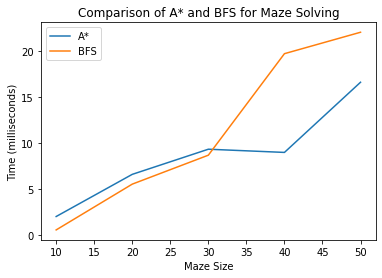

In [15]:
# plotting results
maze_sizes = [10, 20, 30, 40, 50]
plt.plot(maze_sizes, a_star_time, label="A*")
plt.plot(maze_sizes, BFS_time, label="BFS")
plt.xlabel("Maze Size")
plt.ylabel("Time (milliseconds)")
plt.title("Comparison of A* and BFS for Maze Solving")
plt.legend()
plt.show()

`When comparing the efficiency of A* and Breadth First Search (BFS) algorithm, it can be seen that when the maze size is around 10 to 30, the A* algorithm performs slightly worse than BFS when solving the maze. However, when the maze size is increased to 40 and 50, the A* algorithm performs better than BFS by a significant margin. This is because as the maze size increases, the size of BFS algorithm’s search path increases faster than A* algorithm’s search path size due to the fact that BFS has to visit some cells for 3 times.`